## Metody Nieparametryczne w Statystyce
# Zadanie 8
Za pomocą odpowiednich symulacji zbadać moc testu Kołmogorowa i testu Kołmogorowa z wykorzystaniem PIT (probability integral transform), z hipotezą główną, że cecha ma rozkład normalny w przypadku, gdy dane pochodzą z rozkładu 𝑡-Studenta lub z rozkładu 𝜒2 (uwaga: żeby wyniki były porównywalne trzeba pamiętać o standaryzacji danych). 
### autor: Maciej Komosa

1. Importowanie potrzebnych bibliotek.

In [5]:
import numpy as np, pandas as pd
from scipy.stats import kstest, chisquare, norm, t, chi2, uniform
from sklearn import preprocessing
import math

# wyciszenie ostrzeżeń dla testu chi kwadrat 
# który zwraca uwagę na to, że w niektórych przedziałach nie ma obserwacji
import warnings
warnings.filterwarnings('ignore')

2. Badanie mocy testu Kołmogorowa dla wektorów z rozkładów t-Studenta i chi2

<Axes: >

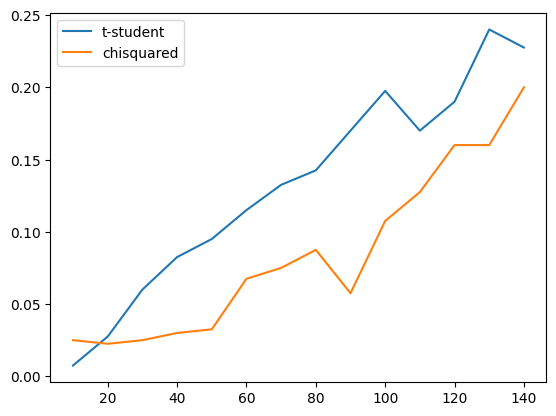

In [3]:
results = pd.DataFrame(columns=["t-student", "chisquared"])
buf = []

for n in range (10, 150, 10):
    for i in range (0, 100):
        for df in [2, 5, 8, 15]:
            # generowanie próby z rozkładu t-studenta
            xt = preprocessing.scale(t.rvs(df, size=n))

            #test kolmogorova-smirnova
            buf.append(kstest(xt, norm.cdf)[1] < .05)
            
            # generowanie próby z rozkładu chi kwadrat i przekształcanie jej
            # do postaci histogramowej dla pierwiastka z n przedziałów
            xchi2 = np.histogram(chi2.rvs(df, size=n), bins=round(math.sqrt(n)))[0]
            xnorm = np.histogram(norm.rvs(0, 1, size=n), bins=round(math.sqrt(n)))[0]
            
            # obliczanie częstości występowania w każdym z przedziałów
            xchi2 = xchi2 / np.sum(xchi2)
            xnorm = xnorm / np.sum(xnorm)

            # test chi kwadrat
            buf.append(chisquare(xchi2, xnorm)[1] < .05)

    results.loc[n] = [np.mean(buf[0::2]), np.mean(buf[1::2])]
    buf.clear()
results.plot(xlabel="sample size", ylabel="statistical power")

Moc testu rośnie znacząco przy wzroście liczby obserwacji zarówno dla rozkładu t-Studenta, jak i chi-kwadrat.

3. Badanie mocy testu Kolmogorova z wykorzystaniem PIT dla wektorów z rozkładów t-Studenta i chi2.

<Axes: ylabel='statistical power'>

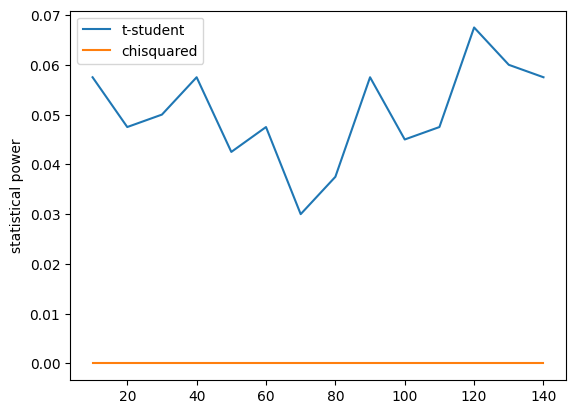

In [10]:
results = pd.DataFrame(columns=["t-student", "chisquared"])
buf = []

for n in range (10, 150, 10):
    for i in range (0, 100):
        for df in [2, 5, 8, 15]:
            # generowanie próby z rozkładu t-studenta
            # i przekształcanie jej za pomocą dystrybuanty
            xt = t.cdf(t.rvs(df, size=n), df)

            #test kolmogorova-smirnova porównujący dane z rozkładem jednostajnym
            buf.append(kstest(xt, uniform.cdf)[1] < .05)
            
            # generowanie próby z rozkładu chi kwadrat i przekształcanie jej
            # najpierw za pomocą dystrybuanty, a następnie do postaci histogramowej
            # dla pierwiastka z n przedziałów
            xchi2 = np.histogram(chi2.cdf(chi2.rvs(df, size=n), df), bins=round(math.sqrt(n)))[0]
            
            # obliczanie częstości występowania w każdym z przedziałów
            xchi2 = xchi2 / np.sum(xchi2)

            # test chi kwadrat z założeniem o rozkładzie jednostajnym
            buf.append(chisquare(xchi2)[1] < .05)

    results.loc[n] = [np.mean(buf[0::2]), np.mean(buf[1::2])]
    buf.clear()
results.plot(ylabel="statistical power")